In [86]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
# Load the dataset
data = pd.read_csv('insurance.csv')
# Display the first few rows of the dataset to get a quick overview
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
# Convert categorical variables to numerical values for modeling
# Convert 'sex' column with values 'male' and 'female' to 0 and 1
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
# Convert 'smoker' column with values 'yes' and 'no' to 1 and 0
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
# Convert 'region' column with four different regions to numerical values (1, 2, 3, 4)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

X = data[['age', 'bmi', 'children','smoker','region']]
y = data['charges']

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the linear regression model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared
# Calculate the R-squared value, which represents the goodness of fit of the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared (scikit learn): {r2}")

R-squared (scikit learn): 0.7833112270019789


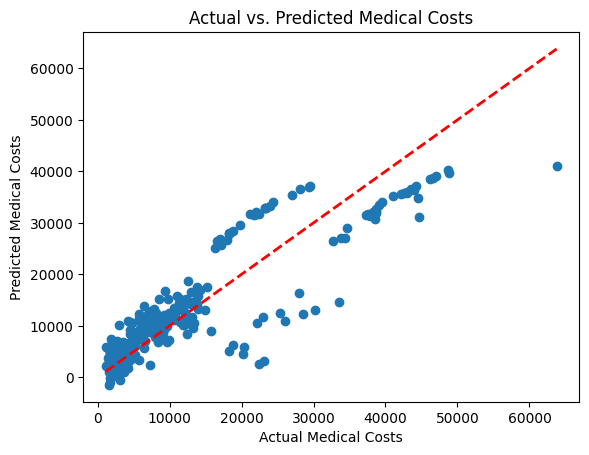

In [89]:
# Create a scatter plot to visualize the model's predictions
plt.scatter(y_test, y_pred)
# Scatter plot with actual medical costs on the x-axis and predicted costs on the y-axis
plt.xlabel("Actual Medical Costs")
plt.ylabel("Predicted Medical Costs")
plt.title("Actual vs. Predicted Medical Costs")
# Add a red dashed line representing a perfect prediction
# The first set of values [min(y_test), max(y_test)] represents the X-coordinates of the line's endpoints.
# min(y_test) corresponds to the minimum value in the y_test dataset, which contains the actual medical costs.
# max(y_test) corresponds to the maximum value in the y_test dataset, representing the highest actual medical cost.
# The second set of values [min(y_test), max(y_test)] represents the Y-coordinates of the line's endpoints, which are the same as the X-coordinates.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)


In [90]:
# Get the model coefficients (weights)
print('W: ',model.coef_)
# Get the model intercept (bias)
print('b: ', model.intercept_)
print('Test: ',X_test)
# Use the trained model to make predictions on the test data
print('predected: ',model.predict(X_test))

W:  [  257.06145793   335.75108952   424.96403144 23646.18756217
   271.12991466]
b:  -13039.782067573806
Test:        age     bmi  children  smoker  region
764    45  25.175         2       0       4
887    36  30.020         0       0       3
890    64  26.885         0       1       3
1293   46  25.745         3       0       3
259    19  31.920         0       1       3
...   ...     ...       ...     ...     ...
109    63  35.090         0       1       2
575    58  27.170         0       0       3
535    38  28.025         1       0       4
543    54  47.410         0       1       2
846    51  34.200         1       0       1

[268 rows x 5 columns]
predected:  [ 8914.96493927  7107.0678691  36898.39658757  9517.238635
 27021.13771661 10800.12318837   217.21115751 16952.18603189
  1047.59475078 11277.20996742 28056.59782564  9433.68134265
  5317.09881191 38467.44312397 40311.2873826  37154.6293352
 15278.27376368 35954.08028697  9170.0869188  31500.10597112
  3807.15549196 10080

In [91]:
# test the model with a new data point to make a prediction for its medical costs billed by health insurance
test_data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
test_df = pd.DataFrame(test_data, index)
cost_pred = model.predict(test_df)
print("The medical costs billed by health insurance : ", cost_pred)

The medical costs billed by health insurance :  [33245.44352109]


##Python form scratch implementation

In [84]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the LinearRegression model with specified hyperparameters.

        Parameters:
        - learning_rate (float): The learning rate for gradient descent. Default is 0.01.
        - n_iterations (int): The number of iterations for gradient descent. Default is 1000.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Fit the linear regression model to the training data using gradient descent.

        Parameters:
        - X (array-like, shape = [m, n]): Training data where m is the number of samples and n is the number of features.
        - y (array-like, shape = [m]): Target values.

        This method initializes model parameters and iteratively updates them using gradient descent.
        """
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)  # Initialize model parameters to zeros
        self.X = X
        self.y = y

        for _ in range(self.n_iterations):
            self.gradient_descent()  # Perform gradient descent for a specified number of iterations

    def gradient_descent(self):
        """
        Perform one step of gradient descent to update model parameters.

        This method calculates the predicted values, computes the error, and updates model parameters
        using the gradient descent algorithm.
        """
        y_pred = np.dot(self.X, self.theta)  # Calculate predicted values
        error = y_pred - self.y  # Calculate the error
        gradient = (1 / self.m) * np.dot(self.X.T, error)  # Calculate the gradient
        self.theta -= self.learning_rate * gradient  # Update model parameters

    def predict(self, X):
        """
        Make predictions for new data.

        Parameters:
        - X (array-like, shape = [m, n]): Data for which predictions are to be made.

        Returns:
        - y_pred (array-like, shape = [m]): Predicted target values.

        This method uses the trained model to make predictions for new data.
        """
        y_pred = np.dot(X, self.theta)  # Calculate predicted values
        return y_pred


# Create and train the linear regression model
model2 = LinearRegression(learning_rate=0.0001, n_iterations=10000)
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# Evaluate the model
# Calculate the R-squared value, which represents the goodness of fit of the model
r2_2 = r2_score(y_test, y_pred2)
print(f"R-squared (python implementation): {r2_2}")

R-squared (python implementation): 0.3034424512515599


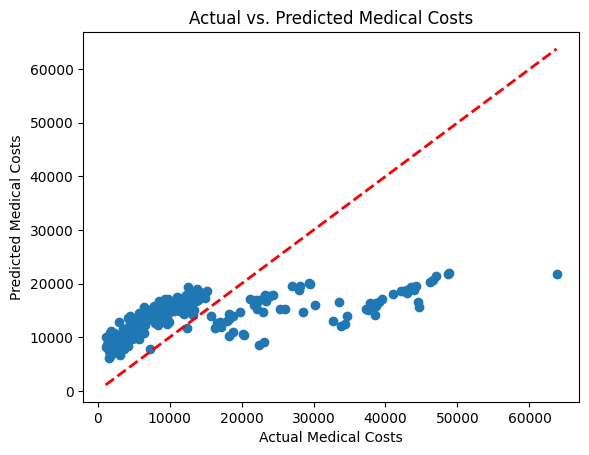

In [85]:
# Create a scatter plot to visualize the model's predictions
plt.scatter(y_test, y_pred2)
# Scatter plot with actual medical costs on the x-axis and predicted costs on the y-axis
plt.xlabel("Actual Medical Costs")
plt.ylabel("Predicted Medical Costs")
plt.title("Actual vs. Predicted Medical Costs")
# Add a red dashed line representing a perfect prediction
# The first set of values [min(y_test), max(y_test)] represents the X-coordinates of the line's endpoints.
# min(y_test) corresponds to the minimum value in the y_test dataset, which contains the actual medical costs.
# max(y_test) corresponds to the maximum value in the y_test dataset, representing the highest actual medical cost.
# The second set of values [min(y_test), max(y_test)] represents the Y-coordinates of the line's endpoints, which are the same as the X-coordinates.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
